# K-Nearest Neighbor
K-nearest neighbor(KNN) is an algorithm that often used in classification task. It predicts a class for test data by calculating the distances between the test data and all the training data. We are going to implement a KNN classifier with MNIST dataset in this exercise.

MNIST dataset contains 70,000 sets of images and labels for handwritten digits. Each image is 28*28 pixel in grayscale and labeled between 0 to 9.

## Data Preparation and Visualization

In [46]:
import torchvision

def load_data():
    train_dataset = torchvision.datasets.MNIST(root='./mnist/', train=True, transform=torchvision.transforms.ToTensor(), download=True)
    test_dataset = torchvision.datasets.MNIST(root='./mnist/', train=False, transform=torchvision.transforms.ToTensor(), download=True)
    train_data = train_dataset.data.numpy()
    train_label = train_dataset.targets.numpy()
    test_data = test_dataset.data.numpy()
    test_label = test_dataset.targets.numpy()
    labels = train_dataset.classes
    return train_data, train_label, test_data, test_label, labels

In [47]:
# from google.colab import drive
# drive.mount('/content/drive')

In [48]:
# import sys
# sys.path.append('/content/drive/MyDrive/HW2/')

In [49]:
import numpy as np
import matplotlib.pyplot as plt

In [50]:
train_data, train_label, test_data, test_label, classes = load_data()
train_data = train_data.astype(np.int32)
train_label = train_label.astype(np.int32)
test_data = test_data.astype(np.int32)
test_label = test_label.astype(np.int32)

In [51]:
print(f'Shape of training data: {train_data.shape}')
print(f'Shape of training labels: {train_label.shape}')
print(f'Shape of test data: {test_data.shape}')
print(f'Shape of test labels: {test_label.shape}')
print(f'Number of classes: {len(classes)}')

Shape of training data: (60000, 28, 28)
Shape of training labels: (60000,)
Shape of test data: (10000, 28, 28)
Shape of test labels: (10000,)
Number of classes: 10


/tmp/ipykernel_111502/2509462858.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


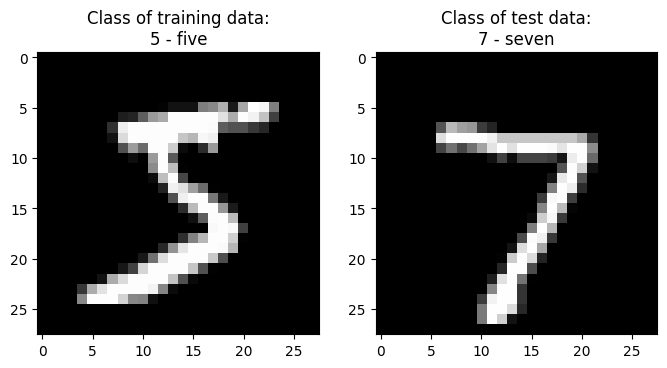

In [52]:
# Display samples of training data and test data with their classes
plt.rcParams['figure.figsize'] = (8, 5)
plt.rcParams['image.cmap'] = 'gray'
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(train_data[0]); ax1.set_title(f'Class of training data:\n{classes[train_label[0]]}')
ax2.imshow(test_data[0]); ax2.set_title(f'Class of test data:\n{classes[test_label[0]]}')
fig.show()

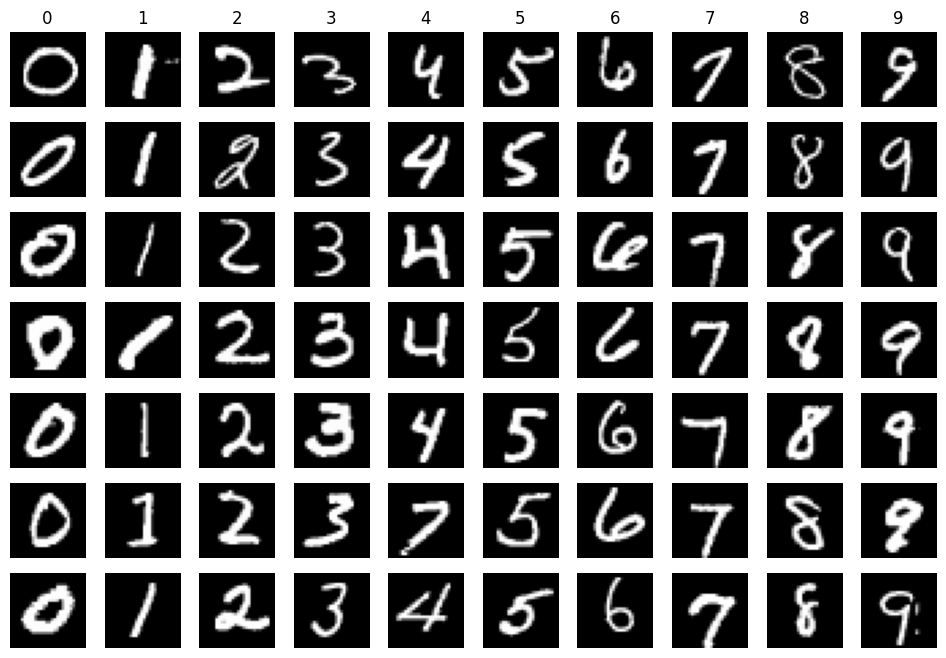

In [53]:
# Display samples of training data from every classes
plt.rcParams['figure.figsize'] = (12, 8)
num_classes = len(classes)
num_example = 7
for label, _ in enumerate(classes):
  idxs = np.flatnonzero(train_label == label)
  idxs = np.random.choice(idxs, num_example, replace=False)
  for i, idx in enumerate(idxs):
    plt_idx = i * num_classes + label + 1
    plt.subplot(num_example, num_classes, plt_idx)
    plt.imshow(train_data[idx]); plt.axis('off')
    if i == 0:
      plt.title(label)
plt.show()

## KNN Implementation

In [54]:
class knn(object):
  def __init__(self, data, label):
    self.num_train_data = data.shape[0]
    self.train_data = data.reshape(self.num_train_data, -1)
    self.train_label = label

  def predict(self, test_data, dist_metric='l1', k=3):
  # def predict(self, test_data, dist_metric='l1', k=3, debug=False):
    num_test_data = test_data.shape[0]
    dists = np.zeros((num_test_data, self.num_train_data))
    if dist_metric == 'l1':
      ####################
      # TODO:
      # 1. Flatten test_data, that is, change its shape from (num_test_data, test_data_height, test_data_width) to (num_test_data, flatten_test_data)
      # 2. Caculate L1 distances between test data and all the training data for each test data, and then store distances in variable `dists`
      ####################
      # -----START OF YOUR CODE-----
      test_data_flat = test_data.reshape((num_test_data, -1))
        # print(test_data.shape, test_data_flat.shape, self.train_data.shape)
      for i in range(num_test_data):
        dists[i, :] = np.sum(np.abs(self.train_data - test_data_flat[i, :]), axis=1)
      # dists = np.asarray([np.sum(np.abs(self.train_data - test_data_flat), axis=1) for i in range(num_test_data)], dtype=float)
      # ------END OF YOUR CODE------
    elif dist_metric == 'l2':
      ####################
      # TODO:
      # 1. Flatten test_data, that is, change its shape from (num_test_data, test_data_height, test_data_width) to (num_test_data, flatten_test_data)
      # 2. Caculate L2 distances between test data and all the training data for each test data, and then store distances in variable `dists`
      ####################
      # -----START OF YOUR CODE-----
      test_data_flat = test_data.reshape((num_test_data, -1))
      #   print(test_data.shape, test_data_flat.shape, self.train_data.shape)
      for i in range(num_test_data):
        dists[i, :] = np.sqrt(np.sum(np.square(self.train_data - test_data_flat[i, :]), axis=1))
      # dists = np.asarray([np.sqrt(np.sum(np.square(self.train_data - test_data_flat[i, :]), axis=1)) for i in range(num_test_data)], dtype=float)
      # ------END OF YOUR CODE------
    else:
      raise ValueError("dist_metric can only be 'l1' or 'l2'")

    ####################
    # TODO:
    # 1. Take majority vote from k closest data to assign each test data a label, and then store labels in variable `preds`
    ####################
    # -----START OF YOUR CODE-----
    preds = np.zeros(num_test_data)
    knn_idx =  np.argpartition(dists, k)
    for i in range(num_test_data):
      knn_label = self.train_label[knn_idx[i, :k]]
      label_set, label_freq = np.unique(knn_label, return_counts=True)
      # if debug: print(knn_label)
      preds[i] = label_set[np.argmax(label_freq)]
    # ------END OF YOUR CODE------
    return preds

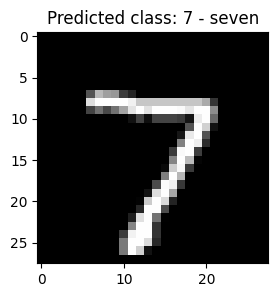

In [55]:
# Run a single test
single_test_data = test_data[:1]
num_test_data, test_data_height, test_data_width = single_test_data.shape
classifier = knn(train_data, train_label)
predicted_label = classifier.predict(single_test_data, k=9, dist_metric='l1').astype(np.int32)
plt.rcParams['figure.figsize'] = (3, 3)

plt.imshow(single_test_data.reshape(test_data_height, test_data_width))
plt.title(f'Predicted class: {classes[predicted_label[0]]}')
plt.show()

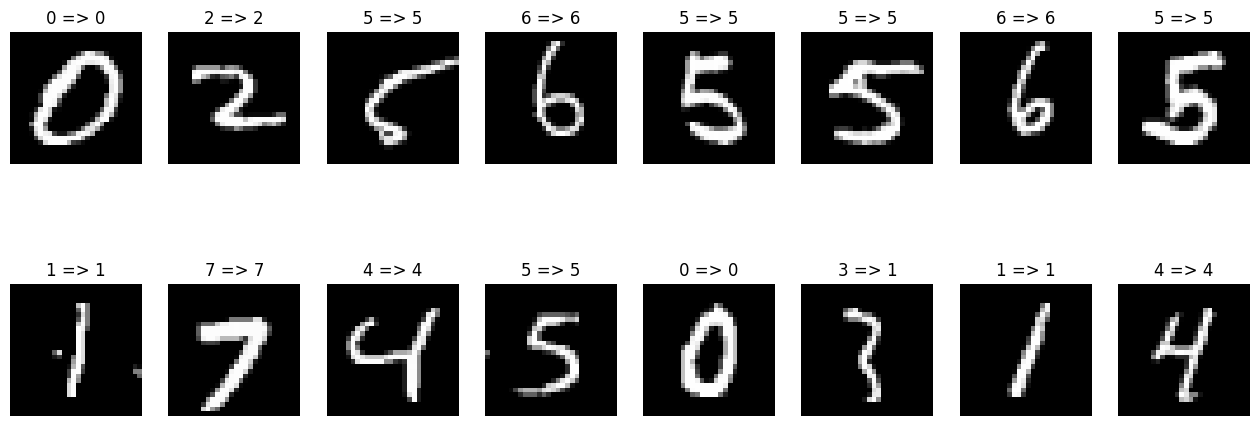

[[2 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [0 0 0 0 2 0 0 0]
 [0 0 0 0 0 5 0 0]
 [0 0 0 0 0 0 2 0]
 [0 0 0 0 0 0 0 1]]


In [56]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

N, M = 16, 2
X_train, X_test, y_train, y_test = train_test_split(train_data, train_label, train_size=20000, test_size=N)

classifier = knn(X_train, y_train)
y_pred = classifier.predict(X_test, k=1, dist_metric='l2').astype(np.int32)

plt.rcParams['figure.figsize'] = (16, 6)
for i in range(N):
    plt.subplot(M, N//M, i+1)
    plt.imshow(X_test[i].reshape(test_data_height, test_data_width))
    plt.axis('off')
    plt.title(f'{y_test[i]} => {y_pred[i]}')
plt.show()

cm = confusion_matrix(y_true = y_test, y_pred = y_pred)
print(cm)

## Applied in Small Dataset 

In [57]:
small_train_data = train_data[:5000]
small_train_label = train_label[:5000]
small_test_data = test_data[:500]
small_test_label = test_label[:500]
# small_train_data, small_test_data, small_train_label, small_test_label = train_test_split(test_data, test_label, train_size=5000, test_size=100, random_state=87)
classifier = knn(small_train_data, small_train_label)
print(f'Number of training data: {small_train_data.shape[0]}')
print(f'Number of test data: {small_test_data.shape[0]}')

Number of training data: 5000
Number of test data: 500


In [58]:
num_test_data = small_test_data.shape[0]
for dm in ['l1', 'l2']:
  print(f'Using {dm.upper()} distance metric:')
  for kv in [1, 2, 3, 5]:
    preds = classifier.predict(small_test_data, k=kv, dist_metric=dm)
    num_correct = np.sum(preds == small_test_label)
    accuracy = float(num_correct) / num_test_data
    print(f'k = {kv}, accuracy = {accuracy}')
    cm = confusion_matrix(y_true = small_test_label, y_pred = preds)
    print(cm)
  print()

Using L1 distance metric:
k = 1, accuracy = 0.894
[[42  0  0  0  0  0  0  0  0  0]
 [ 0 67  0  0  0  0  0  0  0  0]
 [ 1  4 45  1  0  0  1  1  2  0]
 [ 0  2  0 36  0  4  0  3  0  0]
 [ 0  1  0  0 49  0  1  0  0  4]
 [ 0  0  0  2  0 48  0  0  0  0]
 [ 1  0  0  0  1  0 41  0  0  0]
 [ 0  0  0  0  1  0  0 47  0  1]
 [ 1  0  1  2  0  2  1  1 30  2]
 [ 0  1  0  1  6  0  0  4  0 42]]
k = 2, accuracy = 0.884
[[42  0  0  0  0  0  0  0  0  0]
 [ 0 67  0  0  0  0  0  0  0  0]
 [ 1  6 44  1  0  0  1  1  1  0]
 [ 0  3  0 39  0  0  0  3  0  0]
 [ 0  2  0  0 50  0  1  0  0  2]
 [ 0  0  0  3  0 47  0  0  0  0]
 [ 2  0  0  0  1  0 40  0  0  0]
 [ 0  1  0  0  1  0  0 47  0  0]
 [ 2  0  2  2  0  2  1  2 27  2]
 [ 0  1  0  1  7  0  0  5  1 39]]
k = 3, accuracy = 0.892
[[42  0  0  0  0  0  0  0  0  0]
 [ 0 67  0  0  0  0  0  0  0  0]
 [ 1  6 43  0  0  0  1  3  1  0]
 [ 0  3  0 37  0  2  0  3  0  0]
 [ 0  2  0  0 48  0  1  0  0  4]
 [ 0  0  0  2  0 47  1  0  0  0]
 [ 1  1  0  0  0  0 41  0  0  0]
 [ 0  2  

## Applied in Whole Dataset
Try your best to find ideal choices of k value `kv` and distance metric `dm` to maximize the accuracy!

In [59]:
# -----You may change values here-----
kv = 3
dm = 'l2'
# ---------------------------------------

num_test_data = test_data.shape[0]
classifier = knn(train_data, train_label)
preds = classifier.predict(test_data, k=kv, dist_metric=dm)
num_correct = np.sum(preds == test_label)
accuracy = float(num_correct) / num_test_data
print(f'Using {dm.upper()} distance metric, k = {kv}\nAccuracy = {accuracy}')
cm = confusion_matrix(y_true = test_label, y_pred = preds)
print(cm)

In [ ]:
# 自動測試超參數
test_size = 150
classifier = knn(train_data, train_label)
_, x_test, _, y_test = train_test_split(test_data, test_label, test_size=test_size, random_state=87)

for dm in ['l1', 'l2']:
  print(f'Using {dm.upper()} distance metric:')
  for kv in range(1, 16, 2):
    preds = classifier.predict(x_test, k=kv, dist_metric=dm)
    num_correct = np.sum(preds == y_test)
    accuracy = float(num_correct) / test_size
    print(f'k = {kv}, Accuracy = {accuracy}')
    cm = confusion_matrix(y_true = y_test, y_pred = preds)
    print(cm,'\n')

Using L1 distance metric:
k = 1, Accuracy = 0.9266666666666666
[[ 9  1  0  0  0  0  0  1  0  0]
 [ 0 16  0  0  0  0  0  0  0  0]
 [ 0  0 16  0  0  0  0  1  0  0]
 [ 0  0  0 12  0  2  0  0  0  0]
 [ 0  0  0  0 11  0  0  0  0  1]
 [ 0  0  0  0  0 17  0  1  0  1]
 [ 0  0  0  0  0  0 16  0  0  0]
 [ 0  1  0  0  0  0  0 14  0  1]
 [ 0  0  0  0  1  0  0  0 14  0]
 [ 0  0  0  0  0  0  0  0  0 14]] 

k = 3, Accuracy = 0.94
[[ 9  0  0  0  0  1  0  1  0  0]
 [ 0 16  0  0  0  0  0  0  0  0]
 [ 0  0 16  0  0  0  0  1  0  0]
 [ 0  0  0 14  0  0  0  0  0  0]
 [ 0  0  0  0 11  0  0  0  0  1]
 [ 0  0  0  0  0 18  0  1  0  0]
 [ 0  0  0  0  0  0 16  0  0  0]
 [ 0  1  0  0  0  0  0 14  0  1]
 [ 0  0  0  0  1  0  0  0 14  0]
 [ 0  0  0  0  1  0  0  0  0 13]] 

k = 5, Accuracy = 0.9333333333333333
[[ 9  0  0  0  0  1  0  1  0  0]
 [ 0 16  0  0  0  0  0  0  0  0]
 [ 0  0 16  0  0  0  0  1  0  0]
 [ 0  0  0 14  0  0  0  0  0  0]
 [ 0  0  0  0 11  0  0  0  0  1]
 [ 0  0  0  0  0 18  0  1  0  0]
 [ 0  0  0  0